In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('amazon.csv')

In [80]:
# Q1.  What is the average rating for each product category?

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['primary_category'] = df['category'].str.split('|').str[0]

average_ratings = df.groupby('primary_category')['rating'].mean().sort_values(ascending=False)

average_ratings

,rating
primary_category,
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749
Home&Kitchen,4.040716
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


In [85]:
# Q2.  What are the top rating_count products by category?

df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(',', ''), errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df.groupby('category')['rating_count'].std().sort_values(ascending=False)


,rating_count
category,
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",159188.161073
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",96754.602884
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,80612.535365
Electronics|Mobiles&Accessories|MobileAccessories|Chargers|PowerBanks,74024.019264
Computers&Accessories|NetworkingDevices|Repeaters&Extenders,73381.427789
...,...
OfficeProducts|OfficeElectronics|Calculators|Financial&Business,NaN
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper,NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Notebooks,WritingPads&Diaries",NaN


Text(0, 0.5, 'Actual Price')

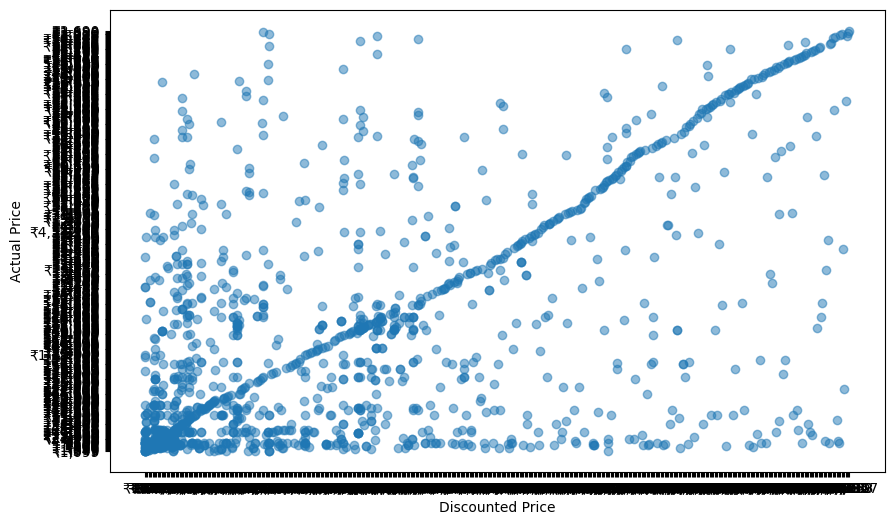

In [86]:
# Q3.  What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(10, 6))
plt.scatter(df['discounted_price'], df['actual_price'], alpha=0.5)
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')


In [87]:
# Q4.  How does the average discount percentage vary across categories?

df['discount_percentage'] = pd.to_numeric(df['discount_percentage'].str.replace('%', ''), errors='coerce')
df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

,discount_percentage
category,
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms,90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,90.0
"Electronics|Headphones,Earbuds&Accessories|Earpads",90.0
"Electronics|Headphones,Earbuds&Accessories|Adapters",88.0
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers",87.5
...,...
OfficeProducts|OfficeElectronics|Calculators|Basic,0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAccessories,0.0
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,0.0


In [88]:
# Q5.  What are the most popular product names?

df['product_name'].value_counts().head(10)

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


In [91]:
# Q6.  What are the most popular product keywords?

from collections import Counter
import re

# Combine all product names into a single text string
all_product_names = " ".join(df['product_name'].dropna())

# Tokenize the text by splitting on non-word characters, converting to lowercase
keywords = re.findall(r'\b\w+\b', all_product_names.lower())

# Count the occurrences of each keyword
keyword_counts = Counter(keywords)

# Get the most common keywords
most_common_keywords = keyword_counts.most_common(20)

most_common_keywords


[('with', 752),
 ('for', 674),
 ('black', 530),
 ('usb', 417),
 ('cable', 414),
 ('1', 413),
 ('and', 331),
 ('c', 289),
 ('3', 275),
 ('2', 267),
 ('charging', 247),
 ('type', 243),
 ('to', 219),
 ('fast', 212),
 ('in', 178),
 ('smart', 175),
 ('white', 170),
 ('tv', 152),
 ('compatible', 146),
 ('5', 137)]

In [93]:
# Q7.  What are the most popular product reviews.

# Combine all review titles and content into a single text string
all_reviews = " ".join(df['review_content'].dropna())

# Tokenize the reviews by splitting on non-word characters, converting to lowercase
review_keywords = re.findall(r'\b\w+\b', all_reviews.lower())

# Count the occurrences of each word in the reviews
review_keyword_counts = Counter(review_keywords)

# Get the most common keywords in the reviews
most_common_review_keywords = review_keyword_counts.most_common(20)

most_common_review_keywords


[('the', 13910),
 ('is', 9912),
 ('it', 9662),
 ('and', 9454),
 ('to', 7858),
 ('i', 7437),
 ('for', 6582),
 ('good', 6455),
 ('a', 6142),
 ('this', 4919),
 ('of', 4544),
 ('in', 4164),
 ('product', 3947),
 ('but', 3608),
 ('not', 3424),
 ('with', 3290),
 ('you', 2877),
 ('very', 2549),
 ('on', 2438),
 ('quality', 2417)]

<Axes: >

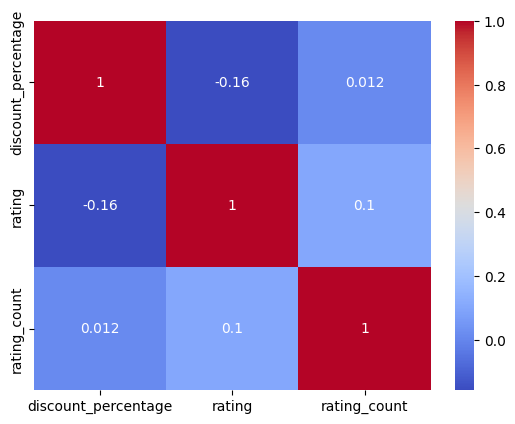

In [95]:
# Q8.  What is the correlation between discounted_price and rating

df[['discounted_price', 'rating']].corr(numeric_only = True)
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [96]:
 # Q9. What are the Top 5 categories based on the highest ratings.

 df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5


In [ ]:
# Q10.  Identify any potential areas for improvement or optimization based on the data analysis.

### Summary of Improvement Areas

# 1. **Product Categories**: Improve quality in low-rated categories like "Car & Motorbike" and "Health & Personal Care" by addressing customer concerns.

# 2. **Highly-Rated but Low Visibility**: Promote high-rated products with few reviews using targeted marketing and discounts.

# 3. **Pricing Strategy**: Focus on product quality and delivery instead of relying on discounts if they don’t influence ratings significantly.

# 4. **Keywords & Descriptions**: Use popular keywords from reviews and product names to enhance visibility and appeal.

# 5. **Outlier Detection**: Investigate poorly rated or heavily discounted products for quality or inventory issues.

# 6. **Rating Count vs. Trust**: Encourage more reviews for highly-rated products with low counts to build trust.

# 7. **Review Insights**: Address recurring issues from negative reviews to improve satisfaction and product quality.